In [1]:
%pylab inline
import csv
from sklearn.metrics import pairwise_distances

Populating the interactive namespace from numpy and matplotlib


# MTH 563 Data Science 2
# Term Project
## Student A
# Consensus Based Stochastic Gradient Descent 

# Introduction:
In this project, I would like to introduce a support vector machine learning algorithm called consensus based stochastic gradient descent. This algorithm is introduced by Avleen Bijral in the paper $\textit{Data-Dependent Convergence for Consensus Stochastic Optimization}$. Consensus based machine learning is a branch of distributed machine learning dealing with training large networks of computers. The learning task that we are primarily concerned with here is basic binary classification. The goal of consensus based learning is to train the whole network to produce a unanimous linear classifier through neighbor communication. Using a process called stochastic gradient descent, each node in the network will try to minimize its objective function and obtain a linear classifier. After individual classifiers are produced, the nodes will then average their classifiers. After many rounds of stochastic gradient descent and averaging, the linear classifiers will be more or less the same for all the nodes. This is when the network is said to have reached a consensus on what the linear classifier should be. The time it takes the whole network to converge to a consensus is called consensus time. In this project, I would like to demonstrate the the relationship between community structure within the network and the consensus time. The dataset I use in this project is the Cover Type dataset. This dataset set contains information about the type of trees that a certain forest area is covered by. The feature vector contains features such as elevation, soil type, slope... This is a multiclass dataset with 7 types of labels corresponding to 7 types of trees. I select out 2 types of trees to do binary classification.

# Support vector machine (SVM) and stochastic gradient descent (SGD)
## Suport Vector Machine (SVM)
Given a training dataset $D=\{ (\textbf{x}_{1},y_{1}),..., (\textbf{x}_{n},y_{n}) \}$, the learning task is to find a classifier $f(\textbf{x})=\textbf{w}^{T}x +b$ that separates into 2 disjoint subsets. Here, the $\textbf{x} \in \mathbb{R}^{d}$ is the feature vector and $y \in \{ -1,1 \}$ is the true class label. However, there could be many hyperplanes separating the dataset into 2 disjoint subsets. We want the hyperplane that maximizes the margin distance to the dataset. The margin distance $\gamma$, defined as $$\gamma = \min_{ i \in [n] } \frac{ | \textbf{w}^{T}x_{i} +b | }{|| (\textbf{w},b) ||_{2}}$$ is the minimal distance from a data point to the hyperplane. The goal of of support vector machine learning is to solve the optimization problem $$ \max \min_{ i \in [n] } \frac{ | \textbf{w}^{T}x_{i} +b | }{|| (\textbf{w},b) ||_{2}} $$ This optimization problem is equivalent to minimizing the objective function $$J(\textbf{w},b)=\frac{1}{n} \sum_{i=1}^{n} l( (\textbf{w},b);( \textbf{x}_{i},y_{i} ) ) + \frac{\nu}{2}|| (\textbf{w},b) ||_{2}^{2}$$ Here, $l( (\textbf{w},b);( \textbf{x}_{i},y_{i} ) )$ is the loss function measuring how far off a predicted label is from the true label and $\frac{\nu}{2}|| (\textbf{w},b) ||_{2}^{2}$ is the regularization term. The purpose of the regularization term is to prevent overfitting and $\nu$ is known as the regularization constant. There are many types of loss functions but the loss function I use in this project is called the hinge loss $$l((\textbf{w},b);( \textbf{x}_{i},y_{i} ) ) = \max{ \{ 0, 1 - y( \textbf{w}^{T}x_{i} +b ) \} }$$
## Stochastic Gradient Descent (SGD)


The goal of distributed machine learning is to distribute the minimization problem $$\min_{ (\textbf{w},b) } J(\textbf{w},b)$$ to $m$ compute nodes connected in a network. The original dataset $D$ is partitioned into $m$ disjoint subsets $D_{1},...,D_{m}$ and each node $i$ gets its local dataset $D_{i}$. Each node $i$ will try to solve its own local minimization problem $$\min_{ (\textbf{w},b) } J_{i}(\textbf{w},b)$$ with $J_{i}(\textbf{w},b)$ being the local objective function. Each node maintains its own local linear classifier $(\textbf{w}_{i},b_{i})$. Local minimization is done through gradient descent $$\textbf{w}_{i}(t+1)=\textbf{w}_{i}(t) - \eta_{t} \frac{ \partial J_{i}(\textbf{w}_{i},b_{i}) }{ \partial (\textbf{w}_{i},b_{i}) }$$ with $\eta_{t} = \frac{1}{\mu t}$ is the learning step size and $\mu$ is the learning constant. Now, $$\frac{\partial J_{i}(\textbf{w}_{i},b_{i}) }{ \partial (\textbf{w}_{i},b_{i}) } = \frac{1}{n} \sum_{i=1}^{n} \partial l((\textbf{w}_{i},b_{i}),(\textbf{x}_{i},y_{i}) + \nu (\textbf{w}_{i},b_{i})$$ where $\partial l((\textbf{w}_{i},b_{i}),(\textbf{x}_{i},y_{i})$ is the sub-differential of the loss function $l$. Since the hinge loss function is not differentiable, we have to resort to using the subgradient to estimate the real gradient. The sub-differential of a function at a point is the set of all subgradients of the function at that point. 

The main idea behind stochastic gradient descent is that istead of computing the the whole sub-differential set then take the average of all the subgradients over the whole subdifferential set at an iteration $t$, we can select a data point $(\textbf{x}_{k},y_{k})$ from the local dataset where the loss function $l((\textbf{w}_{i},b_{i}),(\textbf{x}_{k},y_{k})$ is positive and compute the subgradient $g_{i}(t)$ for $l((\textbf{w}_{i},b_{i}),(\textbf{x}_{k},y_{k})$ and let it represent the entire sub-differential set at that time step. Since $$l((\textbf{w}_{i},b_{i}),(\textbf{x}_{k},y_{k})=\max{ \{ 0, 1 - y_{k}( \textbf{w}_{i}^{T}\textbf{x}_{k} + b_{i} ) \}} = 1 - y_{k}( \textbf{w}_{i}^{T}\textbf{x}_{k} + b_{i} )$$ when the loss is positive. Then, $$g_{i}(t) = \frac{\partial l((\textbf{w}_{i},b_{i}),(\textbf{x}_{k},y_{k}) }{ \partial (\textbf{w}_{i},b_{i}) } = -y_{k}\textbf{x}_{k}$$. Then the gradient descent step can be done as $$h_{i}(t) = \frac{\partial J_{i}(\textbf{w}_{i},b_{i}) }{ \partial (\textbf{w}_{i},b_{i}) } = g_{i}(t) + \nu \textbf{w}_{i}(t) = -y_{k}\textbf{x}_{k} + \nu \textbf{w}_{i}(t)$$

# Consensus based learning:
In addition to individual learning, each node need to communicate its weight vector with those of its neighbors in order to obtain a censensus. The averaging process can be modelled as $$ \textbf{w}_{i}(t+1) = \sum_{j=1}^{m} \textbf{P}_{ij} \textbf{w}_{j}(t) $$ However, the averaging process needs to be carried out at the same time as the SGD process. So, at each iteration, the following operation is carried out $$ \textbf{w}_{i}(t+1) = \sum_{j=1}^{m} \textbf{P}_{ij} \textbf{w}_{j}(t) - \eta_{t} h_{i}(t) $$

So, if we let $\mathcal{W}(t) \in \mathbb{R}^{m \times d}$ be the matrix with each row $i$ being a local weight vector $\textbf{w}_{i}(t)$ for node $i$ at iteration $t$. If we let $H \in \mathbb{R}^{m \times d}$ be the matrix with each row being the stochastic gradient descent vector $h_{i}(t)$ for node $i$ at time $t$. Then we can summarize the whole SGD learning process as $$ \mathcal{W}(t+1) = \textbf{P}\mathcal{W}(t) - \eta_{t} H \quad (*)$$

# Inputting the data into Python
In the following code cell, I use csv reader to read in the first 13,000 samples from the original Cover type dataset which consists of about 58,000 data samples. This set of 13,000 samples are used as the training set. Since there are 7 types of trees in this dataset, there are 7 labels 1,2,...,7 corresponding to each tree type. For the purpose of binary classification select samples of types 2 and 5 among the 13,000 samples. I relabel the type 5 as 1 and type 2 as -1. The reason I picked these 2 types is because they have more or less the same size. Binary classification is most accurate when the training sample is split equally between the two data types. The binary training set is named "Train_set", it is the subset of the set of 13,000 data samples. First, I store the 13,000 samples into an array called "Data_sample". I then pick out the samples in the array Data_sample of types 2 and 5 and store them into the array "Train_set". Then I relabel the labels 2 and 5 within the set Train_set as 1 and -1. This data set has 54 features, the rows of the matrix Data_sample are the data sample. The last column of Data_sample contains the class labels of the samples.

In [2]:
num_sam=13000 # specifying the number of data samples to pick
L_1=[]
with open('covtype.data', 'rt') as f: # use csv reader to read in the text
    reader = csv.reader(f, delimiter='\n', skipinitialspace=True)
    for col in reader:
        L_1.append(col)
L=np.array(L_1)
Data_sample=[] # creating the list to contain data samples
for j in np.arange( num_sam ):
    Data_sample.append( list(map(int, L[j][0].split(',')))) # convert string array to numeric array
Data_sample=np.array(list(Data_sample)) # converting the list to array
L1=np.nonzero(Data_sample[:,54]==5)[0] # reading the indices of samples of type 5
L2=np.nonzero(Data_sample[:,54]==2)[0] # reading the indices of samples of type 2
Lb=np.concatenate((L1,L2),axis=0) # combining the vectors of indices
Train_set=Data_sample[Lb,:] # storing the selected samples into Train_set
#Replacing all the labels 5 by 1
L_special1=np.nonzero(Train_set[:,54]==5)[0]
Train_set[L_special1,54]=1
#Replacing all the labels 2 by -1
L_special2=np.nonzero(Train_set[:,54]==2)[0]
Train_set[L_special2,54]=-1
#Shuffling the train set
np.random.shuffle(Train_set)

In [3]:
print('Number of samples of type 1 in train set = '+str(sum(Train_set[:,54]==1)))
print('Number of samples of type -1 in train set = '+str(sum(Train_set[:,54]==-1)))

Number of samples of type 1 in train set = 1916
Number of samples of type -1 in train set = 1944


In the following cell, I select the next 6,000 data samples right after the first 13,000 data samples for test set. Once again, I pick out the samples of types 2 and 5 only the 6,000 samples and relabel them as -1 and 1 respectively as in the previous part.

In [4]:
D_test=[]# creating the list to contain data samples
for j in np.arange( num_sam,num_sam+6000 ): # pick out the next 6000 samples after the first 13000 samples
    D_test.append( list(map(int, L[j][0].split(',')))) # convert string array to numeric array
D_test=np.array(list(D_test))# converting the list to array
L1=np.nonzero(D_test[:,54]==5)[0]# reading the indices of samples of type 5
L2=np.nonzero(D_test[:,54]==2)[0]# reading the indices of samples of type 2
Lb=np.concatenate((L1,L2),axis=0)# combining the vectors of indices
Test_set=D_test[Lb,:]# storing the selected samples into Test_set
#Replacing all the labels 5 by 1
L_special1=np.nonzero(Test_set[:,54]==5)[0]
Test_set[L_special1,54]=1
#Replacing all the labels 2 by -1
L_special2=np.nonzero(Test_set[:,54]==2)[0]
Test_set[L_special2,54]=-1
#Shuffling the train set
np.random.shuffle(Test_set)

In [5]:
print('Number of samples of type 1 in test set = '+str(sum(Test_set[:,54]==1)))
print('Number of samples of type -1 in test set = '+str(sum(Test_set[:,54]==-1)))

Number of samples of type 1 in test set = 471
Number of samples of type -1 in test set = 3278


# Necessary functions
In this project, I would like to investigate the effects of modular structure on a distributed learning network. I would like to investigate the type of networks where the vertex set $\mathcal{V}$ is partitioned into non-empty disjoint subsets $\mathcal{V}_{1},...,\mathcal{V}_{r}$. Those subsets are known as communities or blocks. Networks with such community structures are known as stochastic block models (SBM). The set of eigenvalues of the graph-encoding matrices of an SBM has 2 parts, the bulk part and the isolated part. The bulk part represents noise and the isolated part correpond directly to the community structure. The farther the isolated eigenvalues are from the bulk, the clearer the commuity structure will be. In this project, I am primarily concerned with the second smallest isolate eigenvalue $\lambda_{2}( \hat{ \mathcal{L} } )$ of the normalized Laplacian matrix $\hat{ \mathcal{L} }$. The smaller $\lambda_{2}( \hat{ \mathcal{L} } )$ is, the clearer the community structure will be. Since, strong community structure leads to slow consensus convergence. There is an inverse relationship between the consensus time $\tau_{c}$ and $\lambda_{2}( \hat{ \mathcal{L} } )$,i.e., $$\tau_{c} \simeq \mathcal{O}( \frac{1}{ \lambda_{2}( \hat{ \mathcal{L} } ) } )$$ Avleen Bijral proposed that $$\mathbb{E}[ \textbf{w}_{i}(t) - \textbf{w}^{*} ] \leq \mathcal{O}( \frac{1}{ \lambda_{2}( \hat{ \mathcal{L} } ) } ) + \mathcal{O}(1)$$ for algorithm $(*)$. I would like to verify this inequality in this project. In order to do this, I need the following functions to compute the loss, subgradients, adjaceny matrix, normalized Laplacian matrices,...

## L2 - norm loss function
In the following code cell, I define the $L_{2}$ loss function $L(x,y,\textbf{w}) = || y - \textbf{w}^{T}x ||_{2}^{2}$

In [6]:
def l2_loss(x,y,w):
    return norm(y-dot(w,x))**2

# Hinge loss
In this cell, I define the hinge loss function $L(x,y,\textbf{w}) = \max{ \{ 0, 1 - y( \textbf{w}^{T}x ) \} }$

In [7]:
def hinge_loss(x,y,w):
    return max( 0, 1 - y*( dot(w,x) ) )

# Different version of hinge loss
Here is another version of the hinge loss function $L(x,y,\textbf{w}) = \max{ \{ 0, 1 - sign( \textbf{w}^{T}x ) \} }$

In [8]:
def hinge_loss2(x,y,w):
    return max( 0, 1 - sign( dot(w,x) ) )

# Data sample with positive hinge loss
Here, I define a function to collect the index of one data sample at a node $i$ that have positive hinge loss $L(x,y,\textbf{w}) = \max{ \{ 0, 1 - y( \textbf{w}^{T}x ) \} }>0 \iff 1 - y( \textbf{w}^{T}x )>0 \iff y( \textbf{w}^{T}x )<1$. I denote the set of all the data samples at node $i$ with positive hinge loss at iteration $t$ at $D_{i,t}^{+}$. Then $D_{i,t}^{+} =  \{(\textbf{x},y) \in D_{i} | y( \textbf{w}_{i}(t)^{T}x)<1\}$. The following function "poss_loss" collect the index of one randomly selected element of $D_{i,t}^{+}$ in $D_{i}$ and return the feature vector and label of that element. So let $X_i$ be a mtrix whose rows are the feature vectors of all the data samples at node $i$. Let $Y_{i}$ be the vector containing the corresponding labels of the vectors in matrix $X_{i}$. Suppose the current local estimate of the weight vector at node $i$ is $w$. Then the command nonzero( Y_{i}*dot( w, X_i.T )<1 ) gives the indices of the samples $(x_{i},y_{i})$ in $X_{i}, Y_{i}$ such that $y_{i}( w^{T} x_{i} )<1$. Then I use the function random.choice to select one of those samples. The whole function will output the feature vector $x_{i}$ and the corresponding label $y_{i}$ of that sample. If $D_{i,t}^{+}$ is an empty set then the function will output a 0 feature vector and label 0.

In [9]:
def pos_loss(w_i,X_i,Y_i,size):
    if len( np.nonzero(Y_i*np.dot(w_i,X_i.T)<1)[0] )!=0:
        Out=np.random.choice(np.nonzero(Y_i*np.dot(w_i,X_i.T)<1)[0])
        A=X_i[Out,:]
        B=Y_i[Out]
    else:
        A=zeros( len(X_i[0,:]) )
        B=0
    return A,B

# Different version of positive hinge loss
Here I implement the selection of positive hinge loss set in a different way with $D_{i,t}^{+} = \{(\textbf{x},y) \in D_{i} | sign( \textbf{w}_{i}(t)^{T}x)<1\}$. Everything else is the same as in the previous step.

In [10]:
def pos_loss_hinge(w_i,X_i,Y_i,size):
    if len( np.nonzero(sign(dot(w_i,X_i.T))<1)[0] )!=0:
        Out=np.random.choice(np.nonzero(sign(dot(w,X_i.T))<1)[0])
        A=X_i[Out,:]
        B=Y_i[Out]
    else:
        A=zeros( len(X_i[0,:]) )
        B=0
    return A,B

# Data sample with positive L2 loss:
Here, I implement the selection of $(\textbf{x},y)$ from $D_{i,t}^{+} = \{(\textbf{x},y) \in D_{i} | L(x,y,\textbf{w}_{i}(t))>0 \}$ with $L(x,y,\textbf{w}_{i}(t))$ being the $L_{2}$ loss function. Everything else is the same as in the previous 2 cells. Here, I compute the matrix $(Y_{i} - \textbf{w}_{i}^{T}(t) \textbf{X}_{i})^{2}$ then perform its row sum. The row sum of a row of this matrix is the $L_{2}$ loss of the data sample on that row.

In [11]:
def pos_loss2(w_i,X_i,Y_i,size):
    Pos2=nonzero(sum((Y_i-dot(w_i,X_i.T))**2,0)>0)[0]
    if len(Pos2)>0:
        Out=choice(Pos2)
        A=X_i[Out,:]
        B=Y_i[Out]
    else:
        A=zeros( len(X_i[0,:]) )
        B=0
    return A,B

# Sub gradient for hinge loss:
Here, I implement the subgradient for the data points on the set $D_{i,t}^{+}=\{(\textbf{x},y) \in D_{i} | y( \textbf{w}_{i}(t)^{T}x)<1\}$ of datat points of positive hinge loss. Since $L(x,y,\textbf{w})=1 - y( \textbf{w}^{T}x )>0 \implies g_{i}(t) = \frac{ \partial L }{ \partial \textbf{w}} = -yx$. Therefore, the subgradient descent is equal to $h_{i}(t) = -yx + \nu \textbf{w}$

In [12]:
def sub_grad(x,y,w,nu):
    h=-y*x+nu*w
    return h

# Sub gradient for L2 loss:
Here, I implement the subgradient for the data points on the set $D_{i,t}^{+}=\{(\textbf{x},y) \in D_{i} | (y - \textbf{w}_{i}(t)^{T}x)^{2} \}$ of datat points of positive $L_{2}$ loss. Since $L(x,y,\textbf{w}_{i}(t))= (y - \textbf{w}_{i}(t)^{T}x)^{2}\implies g_{i}(t) = \frac{ \partial L }{ \partial \textbf{w}_{i}(t)} = -2(y - \textbf{w}_{i}(t)^{T}x)x$. Therefore, the subgradient descent is equal to $h_{i}(t) = -2(y - \textbf{w}_{i}(t)^{T}x)x + \nu \textbf{w}_{i}(t)$

In [13]:
def sub_grad2(x,y,w,nu):
    h=-2*(y-dot(w,x))*x + nu*w
    return h

# Stochastic Block Model functions:
Here, I create some functions dealing specifically with SBMs. An $SBM(n,r, \Pi, N_{block})$ is specified by 4 parameters. The total number of vertices $n$, the number of communities $r$, the edge probaility matrix $\Pi$ whose entry $\Pi_{ij}$ is the edge probability between communities $i,j$, and the diagonal matrix $N_{block} = diag(N_{1},...,N_{r})$ whose diagonal entry $N_{i}$ is the size of the community $i$. In the following code, I define Pi to be $\Pi$, NB to be the diagonal community size matrix $N_{block}$, ncom to be the number of communities $r$, and N_block to be the vector with entries being the sizes of the communities. In this project,we are interested in the case where the the across-community edge probability is $p_{out}$ and within-community edge probability is $p_{in}$ for all communities. In the following cell, I specify some parameters for a 5 community SBM.

In [14]:
N=1000 #specifying the matrix size
ncom=5 #specifying the number of communities
pin=0.4 # within-community edge prob
pout=0.2 # across-community edge prob
N_block=array([100,200,150,250,300]) # community sizes

# pin-pout regime
In the following cell, I create the $\Pi$ matrix for the network where the across-community edge probability is $p_{out}$ and within-community edge probability is $p_{in}$ for all communities. Here, $$\Pi_{ij}=\begin{cases} p_{in}, \text{if $i=j$} \\ p_{out}, \text{if $i \neq j$}  \end{cases}$$

In [15]:
def create_pin_pout(ncom,pin,pout):
    Pi=triu(pout*ones((ncom,ncom)),1)+triu(pout*ones((ncom,ncom)),1).T+diag( pin*ones(ncom) )
    return Pi

In [16]:
Pi=create_pin_pout(ncom,pin,pout)
print(Pi)

[[0.4 0.2 0.2 0.2 0.2]
 [0.2 0.4 0.2 0.2 0.2]
 [0.2 0.2 0.4 0.2 0.2]
 [0.2 0.2 0.2 0.4 0.2]
 [0.2 0.2 0.2 0.2 0.4]]


# Vector of expected degrees
This command generates the vector of expected degrees from the vector N_block=$\begin{pmatrix} N_{1} \\ N_{2} \\ \ddots \\ N_{r} \end{pmatrix}$ containing the sizes of the communities. If we perform the entry-wise product $N_block*\Pi$ then do a column sum over the resulting matrix, we will get a vector with entries being the expected degrees of the each community. Here, the model assumes that all the nodes in the same community have the same expected degree.

In [17]:
def create_deg(N_block,Pi,ncom):
    deg=(N_block*Pi).sum(axis=1)
    return deg

In [18]:
deg=create_deg(N_block,Pi,ncom)
print(deg)

[220. 240. 230. 250. 260.]


# Diagonal matrix of expected degrees:
This command generates diagonal matrix with diagonal entries being the expected degrees. Diagonal entries corresponding to the same block will have the same value.

In [19]:
def create_deg_mat(ncom,N_block,deg):
    w=[]
    for k1 in arange( ncom ):
        w.append( deg[k1]*np.ones( (int(N_block[k1]), ) ) )
    h=concatenate(w,axis=0)
    return diag(h)

# Empirical graph-encoding matrix
Creating the empirical graph-encoding matrix $$matt=\begin{cases} A, \text{for adjacency} \\ I -D^{-1/2} A D^{-1/2}, \text{for Normalized Laplacian} \end{cases}$$ where $A_{ij} = \begin{cases} 1, \text{i,j are connected by an edge} \\ 0, \text{otherwise} \end{cases}$

In [20]:
def create_empir(N,N_block,deg,Pi,mattype,ncom):
    col=zeros((1,N))
    for y1 in arange(ncom):
        row=zeros((int(N_block[y1]),1))
        for y2 in arange(ncom):
            row=concatenate(( row,rand( int(N_block[y1]) , int(N_block[y2]) ) < Pi[y1,y2] ),axis=1)
        row=row[:,1:N+1]
        col=concatenate((col,row),axis=0)
    A=col[1:N+1,:]
    D_deg=create_deg_mat(ncom,N_block,deg)
    if mattype=='adjacency':
        matt=A
    elif mattype=='Nlaplacian':
        matt=eye(N,N)-dot( diag( diag(D_deg)**(-0.5) ) , dot( A,diag( diag(D_deg)**(-0.5) ) ) )
    return matt

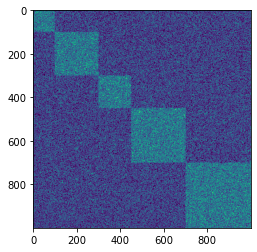

In [21]:
A=create_empir(N,N_block,deg,Pi,'adjacency',ncom)# adjacency
N_lap=create_empir(N,N_block,deg,Pi,'Nlaplacian',ncom) #normalized laplacian
imshow(A);

# Implementation of Bijral's consensus SGD
Here, I implement the consensus SGD algorithm described by equation $(*)$ above. The nodes are connected in an SBM of 400 nodes partitioned into 2 communities of sizes 300 and 100. Here, $p_{in}=0.9$ and $p_{out}=0.85$. In the following cell, I normalize the data so that all the feature vectors in the train set as well as the test set have norm 1. Here, I use the int() function to parse the numnber of data samples at a given node obtained from dividing the total number of data samples over the number of node.

## Normalizing the feature vectors

In [22]:
m=400 # network size
total_size=Train_set.shape[0] # total number of data samples in the training set
test_size=Test_set.shape[0] # total number of samples in the test set
n=Train_set.shape[1] # number of features
size=int(total_size/m) # number of data samples at a node
norm_dat_test=array([Test_set[k,0:n-1]/norm( Test_set[k,0:n-1] ) for k in arange(test_size) ]) # dividing the train data feature vector by its norm
norm_dat=array([Train_set[k,0:n-1]/norm( Train_set[k,0:n-1] ) for k in arange(total_size) ])# dividing the test data feature vector by its norm
# distribute the normalized data set to each node
Loc_X=array([norm_dat[k:k+size,0:n-1] for k in size*arange(m) ]) 
Loc_Y=array([Train_set[k:k+size,n-1] for k in size*arange(m) ])

## Creating the SBM network topology
Here, I use the SBM functions created above to create the adjacency and normalized Laplacian matrices for the SBM specified above. Here, I need to create the vector of expected degrees deg before I create the adjacency matrix.

In [23]:
ncom=2 # number of communities
pin=0.9 # within-community edge prob
pout=0.85 # across-community edge prob
N=m # network size equal to the number of nodes
N1=300 # size of 1st community
N2=100 # size of 2nd community
N_block=array([N1,N2]) # vector containing the sizes of communities
Pi=create_pin_pout(ncom,pin,pout) # matrix of community edge probability
deg=create_deg(N_block,Pi,ncom) # vector of expected degrees
Adj=create_empir(N,N_block,deg,Pi,'adjacency',ncom) # creating the empirical adjaceny
N_lap=create_empir(N,N_block,deg,Pi,'Nlaplacian',ncom) # creating the empirical normalized Laplacian

Here, I create the diagonal degree matrix "Deg" with each diagonal entry $i$ being the real degree of node $i$. I obtain the diagonal matrix of actual degrees Deg by summing the rows of the adjacency matrix "Adj". The transition matrix "P_t" is computed as the dot product of the diagonal degree matrix "Deg" with the empirical adjacency matrix "Adj".

In [24]:
Deg=diag(np.sum(Adj,1)) # summing the rows of adjacency to get actual degrees
P_t=dot(inv(Deg),Adj) # dot product of inverse of degree matrix and adjacency matrix giving transition matrix

# Consensus SGD with hinge loss for high density
Here, I implement the Bijral's consensus SGD algorithm for hinge loss function. The initial weigh vector is initialized to zeros. I specify the total number fo iterations to 700. The learning constant is set as $\lambda=600$ and regularization constant is set as $\nu=0.3$. At each iteration $t$ and node $q$, a feature vector $\textbf{x}_{q,t}$ and its label $y_{q,t}$ in the set $D_{q,t}^{+}$ is selected using the function poss_loss above for the hinge loss function. Once the data sample $(\textbf{x}_{q,t},y_{q,t})$ is selected the sub gradient $-y_{q,t}\textbf{x}_{q,t} + \nu \textbf{w}_{q}(t)$ using the function sub_grad above. Here, if the set $D_{q,t}^{+}$ is empty, then the subgradient is set to $0$. Also at each iteration $t$ and node $q$, the hinge loss $L(\textbf{x}_{q,t},y_{q,t},\textbf{w}_{q}(t))$ is computed. A vector called "Loss1" is created to store all the hinge losses for all the nodes at iteration t. Then I use the function mean() to take the node average of all the hinge losses. The node average of the loss is stored in a different vector called "loss". Since the equation $$\mathcal{W}(t+1) = \textbf{P}\mathcal{W}(t) - \eta_{t} H$$ requires the subgradients to be computed for all the nodes. I created a vector H to store all the subgradients for all the nodes at iteration t. Eventhough all the weight vectors are supposed to be extremely close to each other at the end, there are still some fluctations. Therefore, I take the node average of all the weight vectors at the end and print out this node average vector. I created a matrix called W_list to store the sum of the weight vectors over all iterations. So W_list is a list of matrices with each row j being the sum of weight vectors for node j over all iterations. I then divide this matrix by the number of iterations to get the time average. Then I perform the node average over the time average by summming the rows of the time average matrix and divide this sum by the number of nodes.

In [25]:
W=zeros((N,n-1)) # initialize the weight vector to 0
T=1000 # number of iterations to carry out
nu=0.3 # regularization constatnt
lamb=600 # learning constant
loss=[] # list to store the hinge loss at each step
W_list=zeros(shape(W))  # list to contain all the weight matrices for all iterations
for t in np.arange(1,T+1):
    H=[] # list containing subgradients for the nodes
    Loss1=[] # list to contain lost values for the nodes
    for q in np.arange(m):
        [X_q_t,y_q_t]=pos_loss(W[q],Loc_X[q],Loc_Y[q],size) # select out a data sample (x,y) from positive hinge loss set
        if y_q_t!=0: # if the y label is not zero, the the positive loss set is non-empty
            h_q_t=sub_grad(X_q_t,y_q_t,W[q],nu) # compute regular subgradient
        else: #if the y label is 0, that means the postive hinge loss set is empty 
            h_q_t=0 # the subgradient is set to 0
        H.append(h_q_t) # append the subgradient for the node to the list
        Loss1.append(hinge_loss(X_q_t,y_q_t,W[q])) # append the loss value for the node to the list
    loss.append(mean(Loss1)) # compute the node average for the loss values and append it to the list loss
    W=dot(P_t,W)-np.array(H)/(lamb*t) # Bijral's consensus SGD
    W_list=W_list+W #sum all the weight vectors over all iterations
W=W_list/(T) # time average obtained by dividing the time sum over total number of iterations
w_universal=sum(W,0)/W.shape[0] # sum the weight vectors over the nodes then divide by the number of nodes.
print('list of weight vectors of all nodes: \n\n ' + str(W))

list of weight vectors of all nodes: 

 [[ 7.19472509e-04  2.10145885e-05  9.32598847e-06 ... -1.54799229e-09
  -3.90329761e-10 -2.04030011e-09]
 [ 7.22035566e-04  2.11468592e-05  9.36284297e-06 ... -1.54793769e-09
  -3.90315326e-10 -2.03971959e-09]
 [ 7.24722135e-04  2.14007632e-05  9.36269850e-06 ... -1.54791757e-09
  -3.90306626e-10 -2.04018842e-09]
 ...
 [ 7.23365141e-04  2.08831693e-05  9.35443906e-06 ... -1.54791826e-09
  -3.90306769e-10 -2.04021232e-09]
 [ 7.21352687e-04  2.09809378e-05  9.33412891e-06 ... -1.54755013e-09
  -3.90312417e-10 -2.04024519e-09]
 [ 7.21841216e-04  2.11873650e-05  9.33033207e-06 ... -1.54795591e-09
  -3.90313963e-10 -2.04023236e-09]]


In [26]:
print('Node average of the weight vectors: \n\n ' + str(w_universal) )

Node average of the weight vectors: 

 [ 7.22951968e-04  2.10854405e-05  9.34837042e-06 -4.35451340e-05
  1.65480392e-05 -7.44522801e-04  8.38942447e-05  5.83756368e-05
  7.42180348e-06 -1.84005863e-04  6.79490382e-08 -3.36939663e-08
  2.95393396e-07 -1.52514517e-08  0.00000000e+00  5.68517673e-08
 -8.98173651e-09  5.43052006e-08  0.00000000e+00 -7.44131075e-09
  0.00000000e+00 -4.05984220e-10 -5.53145180e-09 -2.09397280e-09
  5.83939015e-08 -1.11176609e-07  1.48726500e-07  0.00000000e+00
  0.00000000e+00 -2.09020362e-09  6.84036445e-08  1.21515165e-08
  8.72191995e-09 -2.42851590e-08  0.00000000e+00 -2.72039967e-08
  1.39086203e-08 -3.98409350e-08 -3.25701157e-10  6.22064148e-09
 -3.17012731e-09 -2.02939136e-09 -9.94192916e-08  3.41061459e-07
  1.03372360e-08 -8.81922005e-08 -3.35424993e-08 -4.06403862e-09
  0.00000000e+00 -9.08397494e-10  0.00000000e+00 -1.54948924e-09
 -3.90722705e-10 -2.04217078e-09]


Accuracy on test set = 80.39477193918378%
Accuracy on train set = 67.97927461139896%


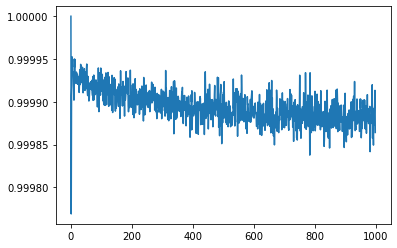

In [27]:
plot(loss)
print('Accuracy on test set = ' + str(100*sum(sign(dot(w_universal,norm_dat_test.T))==Test_set[:,54])/len(Test_set[:,54]) ) +'%' )
print('Accuracy on train set = ' + str(100*sum(sign(dot(w_universal,norm_dat.T))==Train_set[:,54])/len(Train_set[:,54]) ) +'%' )

# SGD on sparse networks
Here, I repeat the same experiment as above for sparse networks with $p_{in}=0.1$ and $p_{out}=0.05$

list of weight vectors of all nodes: 

 [[ 7.79667903e-04  2.79990204e-05  1.01892341e-05 ... -2.41684925e-09
  -5.20278469e-10 -1.44464370e-09]
 [ 7.82103229e-04  2.82062593e-05  1.02166902e-05 ... -2.41805701e-09
  -5.20565642e-10 -1.44397689e-09]
 [ 7.84172462e-04  2.84914975e-05  1.02175794e-05 ... -2.42198939e-09
  -5.20081180e-10 -1.44556275e-09]
 ...
 [ 7.89150072e-04  2.83166795e-05  1.02353808e-05 ... -2.42674831e-09
  -5.20450393e-10 -1.44437032e-09]
 [ 7.83371536e-04  2.81379051e-05  1.01993045e-05 ... -2.41606387e-09
  -5.21136272e-10 -1.44355543e-09]
 [ 7.84005666e-04  2.83252196e-05  1.02012431e-05 ... -2.41801961e-09
  -5.21084356e-10 -1.45381650e-09]]
Node average of the weight vectors: 

 [ 7.85018553e-04  2.82772898e-05  1.02169513e-05 -4.00877498e-05
  1.87458896e-05 -7.57068212e-04  8.83804444e-05  6.29120793e-05
  9.24118744e-06 -1.96571769e-04  8.17919689e-08 -3.25399678e-08
  2.97633348e-07 -1.37768600e-08  0.00000000e+00  4.71182972e-08
 -5.40561637e-09  5.57654

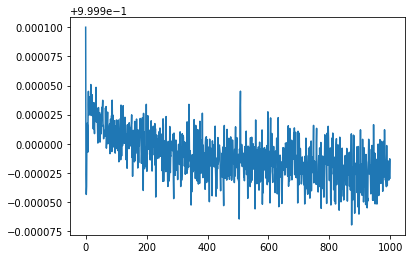

In [28]:
ncom=2 # number of communities
pin=0.1 # within-community edge prob
pout=0.05 # across-community edge prob
N=m # network size equal to the number of nodes
N1=300 # size of 1st community
N2=100 # size of 2nd community
N_block=array([N1,N2]) # vector containing the sizes of communities
Pi=create_pin_pout(ncom,pin,pout) # matrix of community edge probability
deg=create_deg(N_block,Pi,ncom) # vector of expected degrees
Adj=create_empir(N,N_block,deg,Pi,'adjacency',ncom) # creating the empirical adjaceny
N_lap=create_empir(N,N_block,deg,Pi,'Nlaplacian',ncom) # creating the empirical normalized Laplacian
Deg=diag(np.sum(Adj,1)) # summing the rows of adjacency to get actual degrees
P_t=dot(inv(Deg),Adj) # dot product of inverse of degree matrix and adjacency matrix giving transition matrix
W=zeros((N,n-1)) # initialize the weight vector to 0
T=1000 # number of iterations to carry out
nu=0.3 # regularization constatnt
lamb=600 # learning constant
loss=[] # list to store the hinge loss at each step
W_list=zeros(shape(W))  # list to contain all the weight matrices for all iterations
for t in np.arange(1,T+1):
    H=[] # list containing subgradients for the nodes
    Loss1=[] # list to contain lost values for the nodes
    for q in np.arange(m):
        [X_q_t,y_q_t]=pos_loss(W[q],Loc_X[q],Loc_Y[q],size) # select out a data sample (x,y) from positive hinge loss set
        if y_q_t!=0: # if the y label is not zero, the the positive loss set is non-empty
            h_q_t=sub_grad(X_q_t,y_q_t,W[q],nu) # compute regular subgradient
        else: #if the y label is 0, that means the postive hinge loss set is empty 
            h_q_t=0 # the subgradient is set to 0
        H.append(h_q_t) # append the subgradient for the node to the list
        Loss1.append(hinge_loss(X_q_t,y_q_t,W[q])) # append the loss value for the node to the list
    loss.append(mean(Loss1)) # compute the node average for the loss values and append it to the list loss
    W=dot(P_t,W)-np.array(H)/(lamb*t) # Bijral's consensus SGD
    W_list=W_list+W #sum all the weight vectors over all iterations
W=W_list/(T) # time average obtained by dividing the time sum over total number of iterations
w_universal=sum(W,0)/W.shape[0] # sum the weight vectors over the nodes then divide by the number of nodes.
print('list of weight vectors of all nodes: \n\n ' + str(W))
print('Node average of the weight vectors: \n\n ' + str(w_universal) )
print('Accuracy on test set = ' + str(100*sum(sign(dot(w_universal,norm_dat_test.T))==Test_set[:,54])/len(Test_set[:,54]) ) +'%' )
print('Accuracy on train set = ' + str(100*sum(sign(dot(w_universal,norm_dat.T))==Train_set[:,54])/len(Train_set[:,54]) ) +'%' )
plot(loss)

# Effect of community structure on consensus time
Here, I run the same code as above but over many values of "pout". Here, I use the exact same SBM of 2 communities and size 400 as above. Here. The only difference here is that I define the Pout to take 100 values over the interval $[10^{-3},pin]$ then use the for loop to iterate over these values of pout. For each value of pout, I perform 500 iterations of Bijral's SGD algorithm. Since all the weight vectors are the rows of the matrix W. I use the function pairwise_distance to compute the $L_{2}$ distances between the weight vectors at the end of the 500 iterations. I take the mean value of all those pairwise distances between the weight vectors to be an estimate for $\mathbb{E}[ | w_{i}(T) - w^{*} | ]$ for $T=500$. I store this mean average in a variable "err" at each value of pout and append it to a vector E to be plot later.

# Dense networks
Here I set $p_{in}=0.9$ representing dense networks.

In [29]:
mesh_num=20
pin=0.9
Pout=linspace(10**(-3),pin,mesh_num)
lam2=[]
E=[]
for k in arange( len(Pout) ):
    print(k/len(Pout))
    Pi=create_pin_pout(ncom,pin,Pout[k])
    deg=create_deg(N_block,Pi,ncom)
    Adj=create_empir(N,N_block,deg,Pi,'adjacency',ncom)
    N_lap=create_empir(N,N_block,deg,Pi,'Nlaplacian',ncom)
    lam2.append(sorted(eigh(N_lap)[0])[1])
    Deg=diag(np.sum(Adj,1))
    P_t=dot(inv(Deg),Adj)
    W=zeros((N,n-1))
    err=mean(pairwise_distances(W).flatten())
    count=0
    while (count<=500) or (count==0):
        H=[]
        for q in arange(m):
            [X_q_t,y_q_t]=pos_loss(W[q],Loc_X[q],Loc_Y[q],size)
            h_q_t=sub_grad(X_q_t,y_q_t,W[q],nu)
            H.append(h_q_t)
        W=dot(P_t,W)-np.array(H)/(lamb*t)
        err=mean(pairwise_distances(W).flatten())
        count=count+1
    E.append(err)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


Text(0, 0.5, '$\\mathbb{E}[| w_{i}(500) - w^{*} |]$')

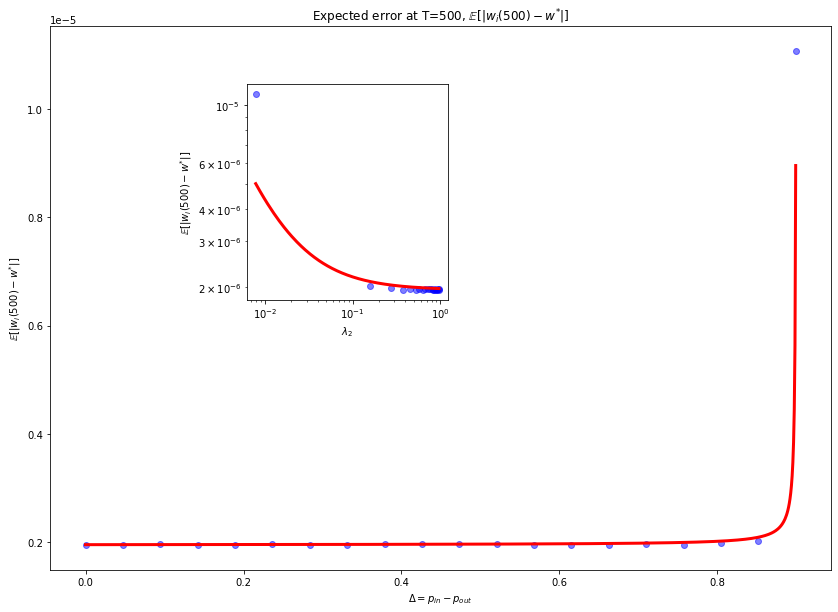

In [30]:
fig, ax1 = subplots(figsize=(14,10))
title('Expected error at T=500, '+r'$\mathbb{E}[| w_{i}(500) - w^{*} |]$')
C1=7e-9
C2=2.4e-8
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.32, 0.5, 0.2, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
l2=linspace(min(pin-Pout[:len(E)]),max(pin-Pout[:len(E)]),1000)
l3=linspace(min(lam2[:len(E)]),max(lam2[:len(E)]),1000)
ax1.plot(pin-Pout[:len(E)],E,'bo',label='Empirical convergence time',alpha=0.5)
ax1.plot(l2,C1/array(0.9-l2)+min(E),'red',linewidth=3)
ax1.set_xlabel(r'$\Delta=p_{in}-p_{out}$')
ax1.set_ylabel(r'$\mathbb{E}[| w_{i}(500) - w^{*} |]$')
ax2.loglog(lam2[:len(E)],E,'bo',label='Empirical convergence time',alpha=0.5)
ax2.loglog(l3,C2/array(l3)+min(E),'red',linewidth=3)
ax2.set_xlabel(r'$\lambda_{2}$')
ax2.set_ylabel(r'$\mathbb{E}[| w_{i}(500) - w^{*} |]$')

# Sparse networks
Here I set $p_{in}=0.1$ representing sparse networks.

In [31]:
mesh_num=20
pin=0.1
Pout=linspace(10**(-3),pin,mesh_num)
lam2=[]
E=[]
for k in arange( len(Pout) ):
    Pi=create_pin_pout(ncom,pin,Pout[k])
    deg=create_deg(N_block,Pi,ncom)
    Adj=create_empir(N,N_block,deg,Pi,'adjacency',ncom)
    N_lap=create_empir(N,N_block,deg,Pi,'Nlaplacian',ncom)
    lam2.append(sorted(eigh(N_lap)[0])[1])
    Deg=diag(np.sum(Adj,1))
    P_t=dot(inv(Deg),Adj)
    W=zeros((N,n-1))
    err=mean(pairwise_distances(W).flatten())
    count=0
    while (count<=500) or (count==0):
        H=[]
        for q in arange(m):
            [X_q_t,y_q_t]=pos_loss(W[q],Loc_X[q],Loc_Y[q],size)
            h_q_t=sub_grad(X_q_t,y_q_t,W[q],nu)
            H.append(h_q_t)
        W=dot(P_t,W)-np.array(H)/(lamb*t)
        err=mean(pairwise_distances(W).flatten())
        count=count+1
    E.append(err)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


Text(0, 0.5, '$\\mathbb{E}[| w_{i}(500) - w^{*} |]$')

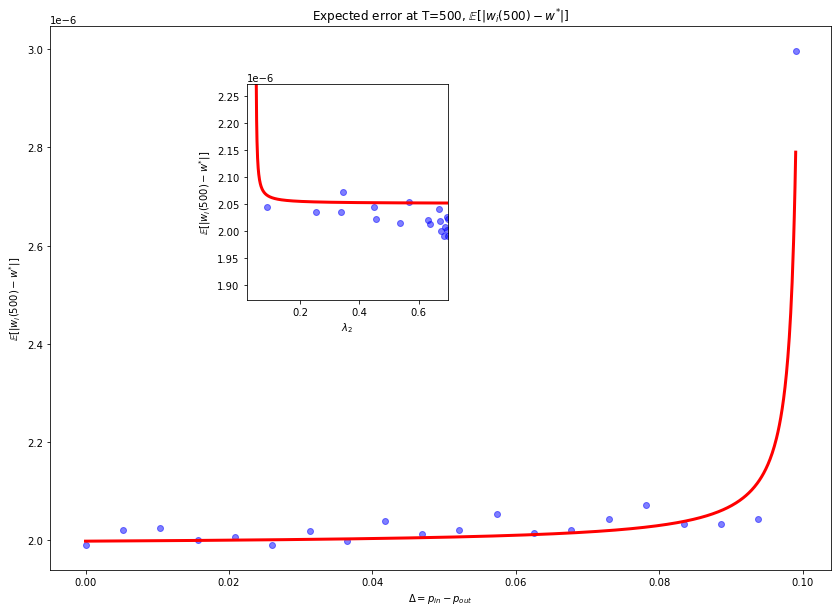

In [32]:
fig, ax1 = subplots(figsize=(14,10))
title('Expected error at T=500, '+r'$\mathbb{E}[| w_{i}(500) - w^{*} |]$')
C1=8e-10
C2=6e-10
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.32, 0.5, 0.2, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
l2=linspace(min(pin-Pout[:len(E)]),max(pin-Pout[:len(E)]),1000)
l3=linspace(0.05,max(lam2),1000)
ax1.plot(pin-Pout[:len(E)],E,'bo',label='Empirical convergence time',alpha=0.5)
ax1.plot(l2,C1/array(0.1-l2)+min(E),'red',linewidth=3)
ax1.set_xlabel(r'$\Delta=p_{in}-p_{out}$')
ax1.set_ylabel(r'$\mathbb{E}[| w_{i}(500) - w^{*} |]$')
ax2.plot(lam2,E,'bo',label='Empirical convergence time',alpha=0.5)
ax2.plot(l3,C2/array(l3-0.05)+1.03*min(E),'red',linewidth=3)
ax2.set_xlim(0.02,max(lam2))
ax2.set_ylim(mean(E)-2e-7,mean(E)+2e-7)
ax2.set_xlabel(r'$\lambda_{2}$')
ax2.set_ylabel(r'$\mathbb{E}[| w_{i}(500) - w^{*} |]$')

# Conclusion:
We can see that the relationship $\mathbb{E}[| w_{i}(500) - w^{*} |] \simeq \mathcal{O}( \frac{1}{ \lambda_{2}(L) } )$ is observed through the numeical experiment. We can see that for the sparse case the change in teh error with respect to $\delta = p_{in} - p_{out}$ is more gradual. This is the regime of further interest because I will show later in the paper that the transition point where error stops decreasing with respect to $\Delta$ in this regime correspond precisely with the point where the second eigenvalue $\lambda_{2}(L)$ joins the bulk. Overall, we can also observe that the accuracy of the algorithm does not change relative to the graph density. Through experiments, I found that only the learning parameter and the regularization constant affect the accuracy.